In [1]:
import numpy as np

###MSE

In [2]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    #print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

### Fit fuction

In [3]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

### Two dimention data

####Linear model

In [4]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

#### Two dimention input

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


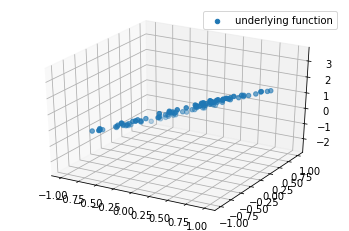

In [5]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

####Initialize linear and loss for two dimention data

4.11304528539977


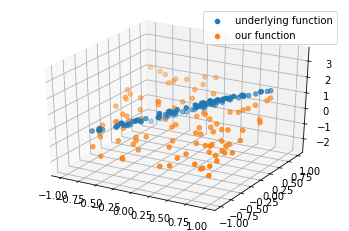

In [6]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

####Train two dimention data

Epoch 0, loss 4.11304528539977
Epoch 1, loss 3.2811644408938565
Epoch 2, loss 2.6491185890206697
Epoch 3, loss 2.1603419798064456
Epoch 4, loss 1.7763006963627381
Epoch 5, loss 1.4703329885413212
Epoch 6, loss 1.223668900800118
Epoch 7, loss 1.0228452796124967
Epoch 8, loss 0.8580163658984867
Epoch 9, loss 0.7218409725111181
Epoch 10, loss 0.608742348913908
Epoch 11, loss 0.5144101620539778
Epoch 12, loss 0.43546077581688103
Epoch 13, loss 0.36920185480293677
Epoch 14, loss 0.31346639541424565
Epoch 15, loss 0.26649350550556994
Epoch 16, loss 0.22684109852925258
Epoch 17, loss 0.19332072082315208
Epoch 18, loss 0.1649479984654176
Epoch 19, loss 0.14090431454272662


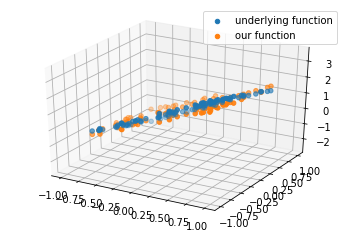

In [7]:
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

###Three dimention data

#### Non-Linear model

In [8]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

class Model:
  def __init__(self, input_dim, num_hidden, ouput_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, ouput_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

####Three dimention input

(100, 3) (3, 2) (2,)
x: (100, 3), weights: (3, 2), bias: (2,), y: (100, 2)


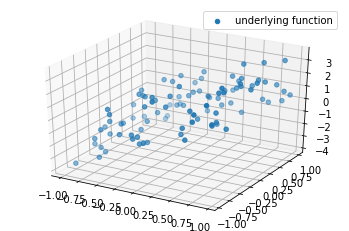

In [9]:
# What about 3-dimensional x?

n = 100
d = 3
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
# y = w@x + b

weights_true = np.array([[3, 1, -1],[2, 0, -2], ]).T
bias_true = np.array([0.5, 0.1])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true[:, 1])

####Initialize linear and loss for three dimention data

(100, 3) (3, 2) (100, 2) (100, 2)
3.364222702549749


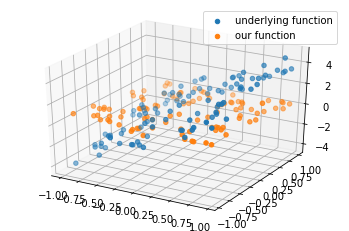

In [10]:
loss = MSE()
# 3-d input and 2-d output with 2 hidden layers
linear = Model(3, 2, 2)
y_pred = linear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true[:, 0], y_pred[:, 0])

####Train three dimention data

In [11]:
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=80)
#plot_3d(x, y_true, linear(x))

Epoch 0, loss 3.364222702549749
Epoch 1, loss 3.0093005595573237
Epoch 2, loss 2.7121381218890237
Epoch 3, loss 2.4545399390543445
Epoch 4, loss 2.235589346300768
Epoch 5, loss 2.043589666271495
Epoch 6, loss 1.858179443664276
Epoch 7, loss 1.6899794160003
Epoch 8, loss 1.537952862864809
Epoch 9, loss 1.3829696933004727
Epoch 10, loss 1.2311447483159341
Epoch 11, loss 1.0720128878350763
Epoch 12, loss 0.9246375987178505
Epoch 13, loss 0.8022750549148583
Epoch 14, loss 0.6924122708332052
Epoch 15, loss 0.6014907186213366
Epoch 16, loss 0.5314316186422787
Epoch 17, loss 0.4779985126957523
Epoch 18, loss 0.4373764290698358
Epoch 19, loss 0.4066943490343259
Epoch 20, loss 0.3829598992190394
Epoch 21, loss 0.36358872248833735
Epoch 22, loss 0.3488020609534705
Epoch 23, loss 0.33737631081787844
Epoch 24, loss 0.32803270795545214
Epoch 25, loss 0.32006630665623503
Epoch 26, loss 0.31351827200489657
Epoch 27, loss 0.3081423008190625
Epoch 28, loss 0.3035819077294516
Epoch 29, loss 0.2994213541